# Let's play with the data from SNCA!

First let's import the data from this year.


In [68]:
import requests
import re
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt

### install
# Install libraries with the following command: pip install -r requirements.txt

### config

# your API key here
key = ''

# the id of the Dataset you want to get
datasetId = 'operations-delta-des-vehicules-au-luxembourg'

# the pattern filenames should match to be downloaded

#fPattern = '^Operations_Delta_\\d{6}.xml$'
fPattern = '^Operations_Delta_202011.xml$'
### end config

url = 'https://data.public.lu/api/1/datasets/'+datasetId+'/'
headers = {'X-API-KEY': key}
r = requests.get(url, headers=headers)
r.raise_for_status()

resources = r.json()['resources']
data = []
columns = []
init = True
for i in range(len(resources)):
    if re.search(fPattern, resources[i]['title']):
        # print('Downloading: '+ resources[i]['title'])
        s = requests.get(resources[i]['url'], headers=headers)
        s.raise_for_status()
        # print('Parsing...')
        xml = ET.fromstring(s.text)
        for operation in xml:
            row = []
            for field in operation:
                if init:
                    columns.append(field.tag)
                row.append(field.text)
            init = False
            data.append(row)
df = pd.DataFrame(data, columns=columns)



Ok now we have some data, let's filter to get only private cars

In [69]:
cars = df[df["CATSTC"] == "5"]

Let's find the most frequent colors of cars in Luxembourg on the given period of time.

<AxesSubplot:ylabel='COUL'>

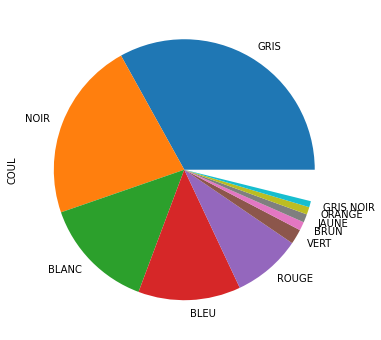

In [70]:
coul = cars['COUL'].value_counts(normalize=True).head(10)
coul.plot.pie(figsize=(6, 6))

<AxesSubplot:>

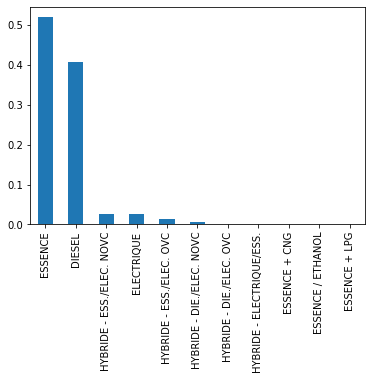

In [71]:
energy = cars['LIBCRB'].value_counts(normalize=True)
energy.plot.bar()

<AxesSubplot:>

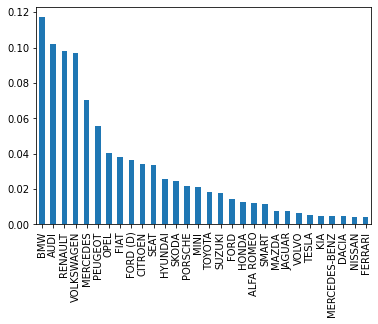

In [72]:
brand = cars['LIBMRQ'].value_counts(normalize=True).head(30)
brand.plot.bar()

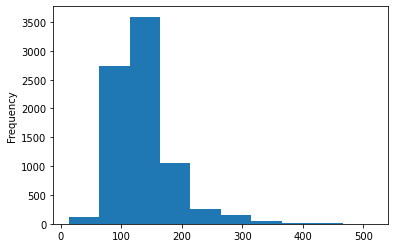

In [73]:
co2 = cars['INFCO2'].dropna().astype('int').plot.hist()